# [1] Imports

We want to import all the libraries we need for the project.

In [1]:
# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from scipy.linalg import svd

# [2] Exploring the data (Exploratory Data Analysis)

Here we want to explore and visualize the data, trying to explain it with graphs and find missing or NaN values.

In [4]:
# Set the data equal to some variables so we can use them later
train = pd.read_csv('experimental/data/train.csv')
test = pd.read_csv('experimental/data/test.csv')
sample_submission = pd.read_csv('experimental/data/sample_submission.csv')

In [5]:
# Find the data types of the data
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


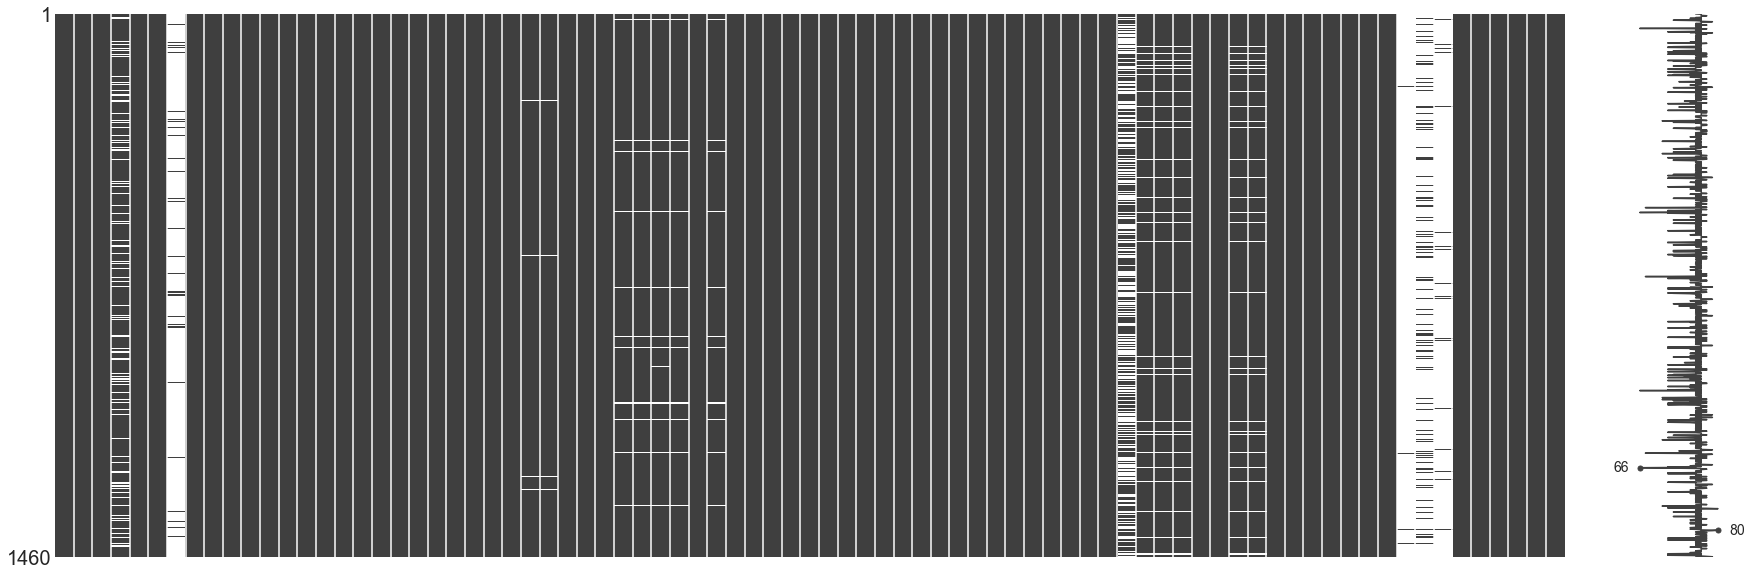

In [6]:
# Look for missing values by plotting
# Black columns are for each feature,
# And the horizontal white lines in those black columns are missing or NaN values
missingno.matrix(train, figsize = (30,10))

In [7]:
# Ok, many values are missing for some specific features
# Let's look at those
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_values = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_values[column] = df_length - total_column_values
    return missing_values

all_missing_values_by_feature = find_missing_values(train, columns=train.columns)
all_missing_values_by_feature

Number of missing or NaN values for each column:


{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

In [8]:
# We remove the features Alley, FireplaceQu, PoolQC, Fence and MiscFeature from the dataset
# Because of too many missing values
train = train.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1)

In [9]:
# df is used as stand-in name for train
def fill_missing_or_nan_values(df):
    fill_with = 0
    
    # Get the most common element by using size(), which returns the element and how common it is
    for column in df:
        column_size = df.groupby([column]).size()
        
        # Check if the column is an object, float64 or int64
        is_it_float = (df[column].dtype == np.float64)
        is_it_int = (df[column].dtype == np.int64)
        
        # If it is an object, find the most common element and fill missing and NaN values
        if(not is_it_float and not is_it_int):
            for i in column_size:
                if i > fill_with:
                    fill_with = i
                    
        # If it is either a float64 or int64, then calculate the mean and fill missing and NaN values            
        else:
            if is_it_float:
                fill_with = np.nanmean(df[column], dtype=np.float64)
            if is_it_int:
                fill_with = np.nanmean(df[column], dtype=np.int64)
        
        # Fill the values in our dataset
        train[column] = train[column].fillna(fill_with)
        fill_with = 0

fill_missing_or_nan_values(train)

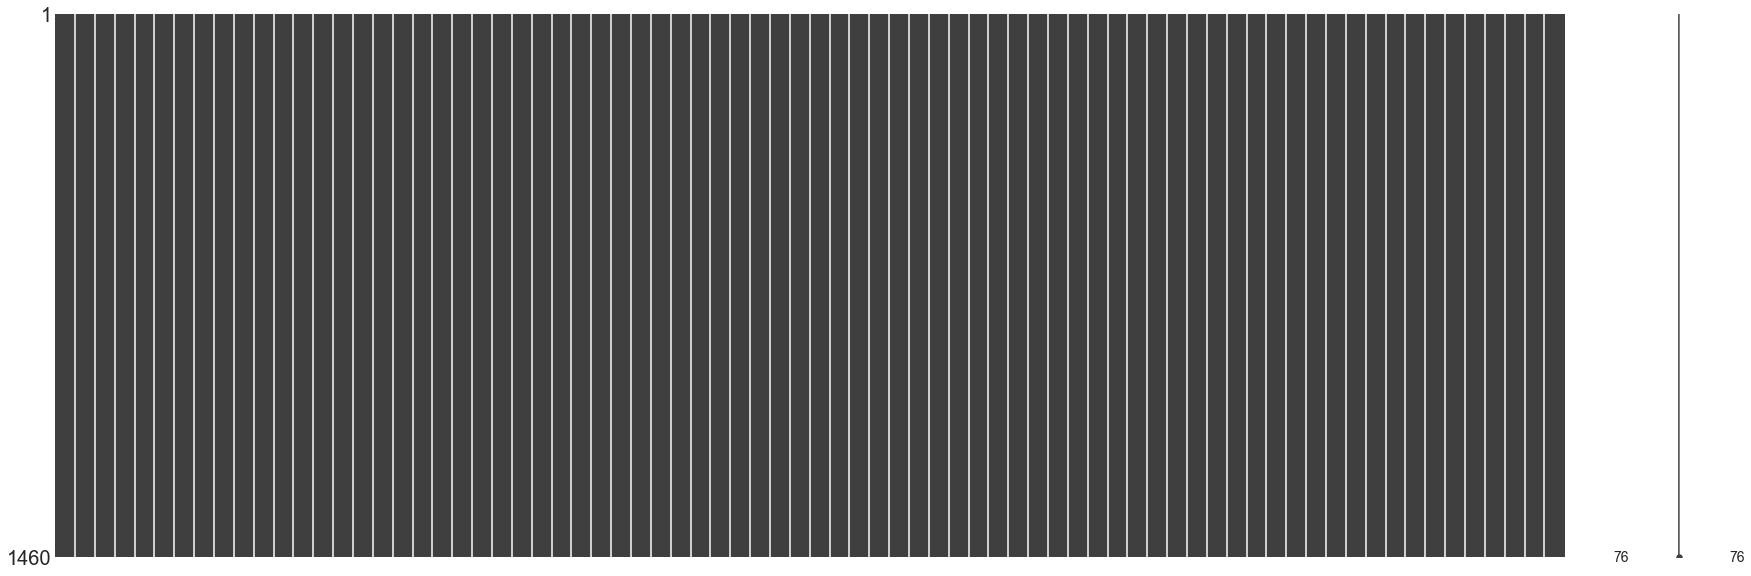

In [11]:
# Check if values have been filled
# NOTE: It has been checked, that the values are correctly filled
missingno.matrix(train, figsize = (30,10))